In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Load the IMDb dataset
max_features = 10000  # Number of words to consider as features
maxlen = 500  # Cut texts after this number of words (among top max_features most common words)

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

# Pad sequences to ensure consistent input length
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

# Define the LSTM model
model = Sequential()
model.add(Embedding(max_features, 128))  # Embedding layer to convert input sequences into dense vectors
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))  # LSTM layer with dropout for regularization
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification (positive or negative sentiment)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
history = model.fit(input_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(input_test, y_test)
print(f'Test accuracy: {accuracy:.4f}')


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 734s 1s/step - accuracy: 0.6951 - loss: 0.5596 - val_accuracy: 0.8472 - val_loss: 0.3662
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 678s 1s/step - accuracy: 0.8596 - loss: 0.3423 - val_accuracy: 0.8352 - val_loss: 0.3847
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 692s 1s/step - accuracy: 0.8656 - loss: 0.3270 - val_accuracy: 0.7958 - val_loss: 0.5075
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 402s 643ms/step - accuracy: 0.8950 - loss: 0.2713 - val_accuracy: 0.8428 - val_loss: 0.3719
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 440s 704ms/step - accuracy: 0.9251 - loss: 0.1997 - val_accuracy: 0.8434 - val_loss: 0.4145
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 412s 660ms/step - accuracy: 0.9376 - loss: 0.1666 - val_accuracy: 0.8482 - val_loss: 0.3995
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 418s 670ms/step - accuracy: 0.9598 - loss: 0.1181 - val_accuracy: 0.8612 - val_loss: 0.4330
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 431s 690ms/step - accuracy: 0.9721 - loss: 0.

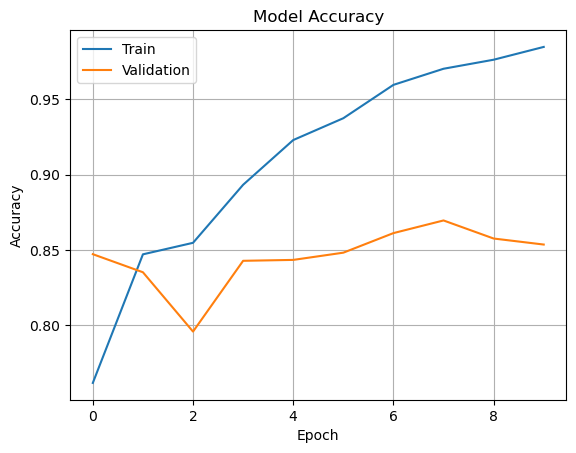

In [5]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation') 
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()